# PORORI

## 1. prepare environment

In [ ]:
%git clone https://github.com/Cathy-CHS/porori.git

In [ ]:
!pip install -r porori/requirements.txt

Restart your session

In [ ]:
import os
os.chdir('/content/porori')

upload the pretrained_weights.zip file.

In [ ]:
from google.colab import files

uploaded = files.upload()

if len(uploaded) > 1:
    raise ValueError('Please upload only one pretrained_weights.zip file')

# upzip the uploaded file
!unzip pretrained_weights.zip

# check the unzipped files
if not os.path.exists('pretrained_weights/kingkorre_all.ckpt'):
    raise ValueError('pretrained_weights/kingkorre_all.ckpt not found')

if not os.path.exists('pretrained_weights/pytorch_model.bin'):
    raise ValueError('pretrained_weights/pytorch_model.bin not found')

## 2. process text and get graph

## 3. Process the graph and analyze it

You can construct knowledge graph of 태조1년7월, 세종실록 전체, 선조20년, 선조 30년. the estimated construction time for 세종실록 전체 is

more than 4 Hours, and it requires excessive call of the open API to EncyKorea.
 
So we recommend you to construct the graph of 태조1년7월, 선조20년, 선조30년, except 세종실록 전체.

We uploaded the precomputed KG for all the test samples including 세종실록, so you can get the results on the poster regarding 세종실록 전체.  



**Before** you start, you need to set up the environment variable to use the EncyKorea openAPI. In the read me file, we provided the openAPI access key. 
Follow the instruction in the readme.md and set the environment variable. 



In [ ]:
# setup environment variables for training.
os.environ['OPENAI_API_KEY'] = "API_ACCESS_KEY_HERE"

Knowledge Graph Construction for 태조1년7월

In [ ]:
!python3 construct_kg.py --current-king=태조 --input-dir="input_texts/taejo_july" --export-path="results/taejo_july"

Knowledge Graph Construction for 선조20년

In [ ]:
!python3 construc_kg.py --current-king=선조 --input-dir="input_texts/sunjo_1587" --export-path="results/sunjo_1587"

Knowledge Graph Construction for 선조30년

In [ ]:
!python3 construc_kg.py --current-king=선조 --input-dir="input_texts/sunjo_1597" --export-path="results/sunjo_1597"

Knowledge Graph Construction for 세종실록전체 (we don't recommend to run this)

In [ ]:
# !python3 construc_kg.py --current-king=세종 --input-dir="input_texts/sejong" --export-path="results/sejong"

## Graph Visualization & Analysis

You can get the number of nodes, edges, average degrees, many centrality & closeness measure, and graph visulaization for each graph.

graph visualization for 태조1년7월

In [9]:
from IPython.display import Image

Removed 232 nodes with degree < 5
Removed 0 isolated nodes
Exported processed graph to graph_analysis_results/taejo_july/processed_graph.gexf
============= Graph Analysis =============
Number of nodes: 702
Number of edges: 14063
average degree of the graph: 40.065527065527064
Figure(1200x800)
============= PageRank =============
Top 10 nodes by pagerank:
정도전 (id: E0050093) - pagerank: 0.0158
조준 (id: E0052623) - pagerank: 0.0154
왕가도 (id: E0039022) - pagerank: 0.0121
공민왕 (id: E0004295) - pagerank: 0.0096
김사형 (id: E0009312) - pagerank: 0.0096
남은 (id: E0012086) - pagerank: 0.0079
남재 (id: E0012125) - pagerank: 0.0068
태조 (id: E0059033) - pagerank: 0.0067
정탁 (id: E0051045) - pagerank: 0.0064
이직 (id: E0046090) - pagerank: 0.0063
============= Degree Centrality =============
Top 10 nodes by degree centrality:
정도전 (id: E0050093) - degree centrality: 0.7133
조준 (id: E0052623) - degree centrality: 0.6833
왕가도 (id: E0039022) - degree centrality: 0.5235
공민왕 (id: E0004295) - degree centrality: 0.4365
김

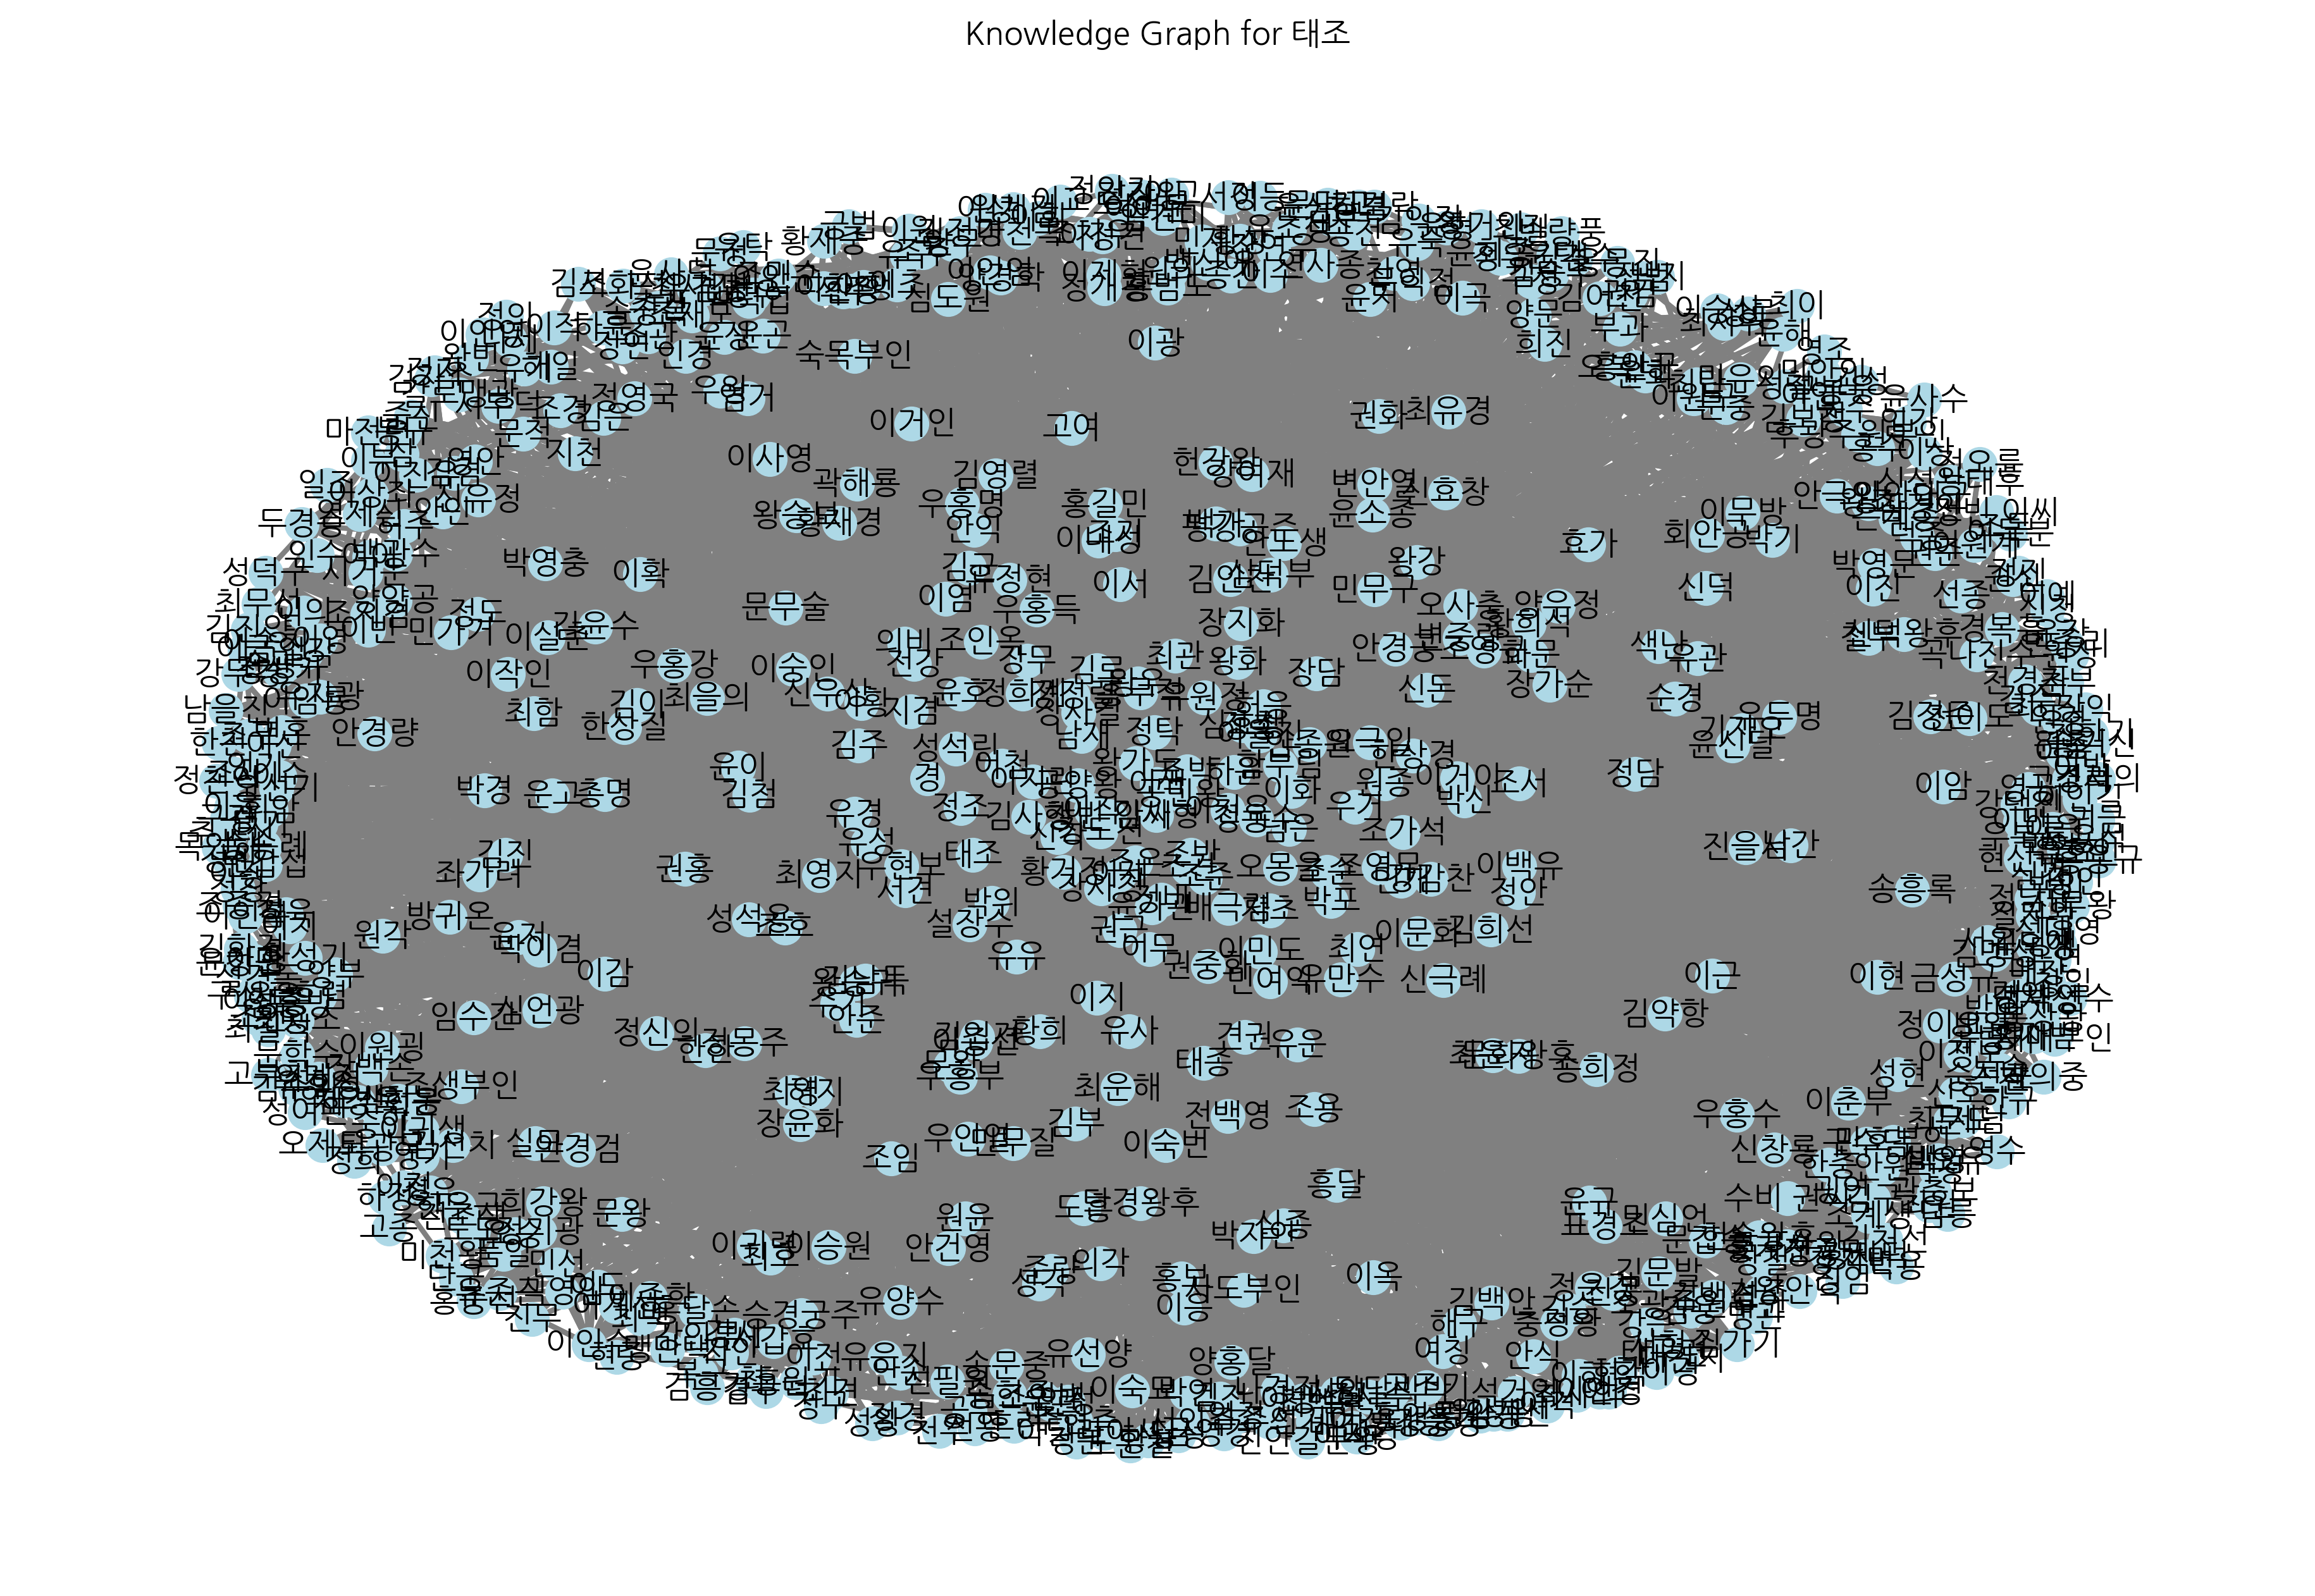

In [11]:
!python3 analyze_graph.py --graph-dir "results/taejo_july_1st" --export-dir "graph_analysis_results/taejo_july" --king-name 태조
image_path = "graph_analysis_results/taejo_july/태조_knowledgegraph.png"
Image(filename=image_path)

In [ ]:
!python3 analyze_graph.py --graph-dir "results/sunjo_1587" --export-dir "graph_analysis_results/sunjo_1587" --king-name 선조
image_path = "graph_analysis_results/sunjo_1587/선조_knowledgegraph.png"
Image(filename=image_path)

In [ ]:
!python3 analyze_graph.py --graph-dir "results/sunjo_1597" --export-dir "graph_analysis_results/sunjo_1597" --king-name 선조
image_path = "graph_analysis_results/sunjo_1597/선조_knowledgegraph.png"
Image(filename=image_path)

In [ ]:
!python3 analyze_graph.py --graph-dir "results/sejong" --export-dir "graph_analysis_results/sejong" --king-name 세종
image_path = "graph_analysis_results/sejong/세종_knowledgegraph.png"
Image(filename=image_path)